In [55]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes, load_digits
from sklearn.preprocessing import PolynomialFeatures


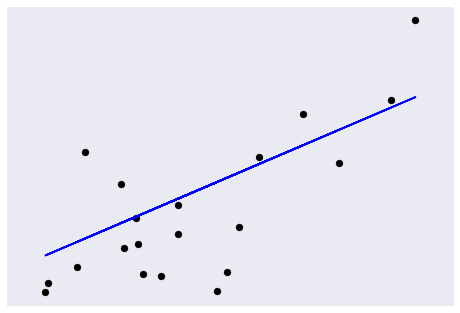

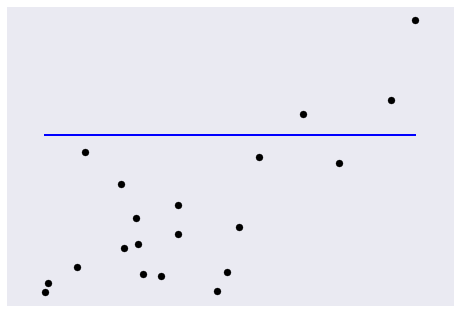

Mean squared error linear: 2548.07
Mean absolute error linear: 41.23
Mean squared error logistic: 10277.60
Mean absolute error linear: 41.23


In [54]:
df = load_diabetes()

df_X = df.data[:, np.newaxis, 2]

df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

df_y_train = df.target[:-20]
df_y_test = df.target[-20:]

regr_lin = LinearRegression()
regr_log = LogisticRegression(C=2)

regr_lin.fit(df_X_train, df_y_train)
regr_log.fit(df_X_train, df_y_train)

df_y_pred_lin = regr_lin.predict(df_X_test)
df_y_pred_log = regr_log.predict(df_X_test)

#poly = PolynomialFeatures(degree=2)
#df_X_train_ = poly.fit_transform(df_X_train)
#df_X_test_ = poly.fit_transform(df_X_test)

#regr_pol = LinearRegression()
#regr_pol.fit(df_X_train_, df_y_train)
#df_y_pred_pol = regr_lin.predict(df_X_test_)

plt.figure()
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred_lin, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure()
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred_log, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()

#plt.figure()
#plt.scatter(df_X_test_, df_y_test, color='black')
#plt.plot(df_X_test_, df_y_pred_pol, color='blue')
#plt.xticks(())
#plt.yticks(())
#plt.show()

print("Mean squared error linear: %.2f" %mean_squared_error(df_y_test, df_y_pred_lin))
print("Mean absolute error linear: %.2f" %mean_absolute_error(df_y_test, df_y_pred_lin))
print("Mean squared error logistic: %.2f" %mean_squared_error(df_y_test, df_y_pred_log))
print("Mean absolute error linear: %.2f" %mean_absolute_error(df_y_test, df_y_pred_lin))
#print("Mean squared error linear: %.2f" %mean_squared_error(df_y_test, df_y_pred_pol))
#print("Mean absolute error linear: %.2f" %mean_absolute_error(df_y_test, df_y_pred_pol))




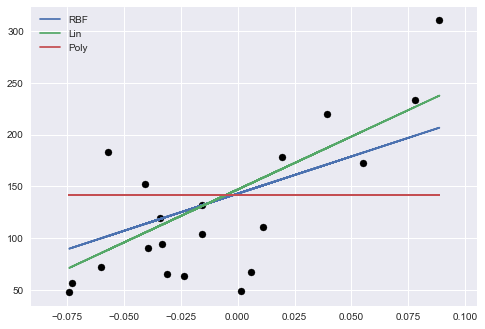

In [61]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=10)
y_rbf = svr_rbf.fit(df_X_train, df_y_train).predict(df_X_test)
y_lin = svr_lin.fit(df_X_train, df_y_train).predict(df_X_test)
y_poly = svr_poly.fit(df_X_train, df_y_train).predict(df_X_test)

plt.figure()
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, y_rbf, label='RBF')
plt.plot(df_X_test, y_lin, label='Lin')
plt.plot(df_X_test, y_poly, label='Poly')
plt.legend()
plt.show()
